# Analisis Clustering Tingkat Obesitas dengan K-Means

**Objective:**
Project ini bertujuan untuk mengelompokkan (clustering) data individu berdasarkan karakteristik fisik dan kebiasaan makan/hidup menggunakan algoritma **K-Means**. Kita akan membandingkan hasil clustering menggunakan dataset dengan *Label Encoding* dan *One-Hot Encoding*.

**Tahapan Pengerjaan:**
1. Data Preprocessing & Standardization
2. Penentuan Jumlah Cluster (Elbow Method)
3. Modelling K-Means
4. Cluster Profiling & Visualization (Heatmap & Radar Chart)

In [2]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from math import pi

## 1. Eksperimen I: Menggunakan Data Label Encoded
Pada tahap ini, kita menggunakan dataset yang telah diproses menggunakan Label Encoding.

### A. Data Loading
Memuat dataset `DataCleanLabel.csv` untuk melihat struktur awalnya.

In [2]:
#Dataset Label Encoder
df_label = pd.read_csv('DataCleanLabel.csv')
df_label.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


### B. Feature Selection & Standardization
Kita memisahkan kolom target dan memilih fitur-fitur numerik yang relevan. Data kemudian dinormalisasi menggunakan `MinMaxScaler` agar berada dalam rentang 0-1.

In [3]:
#Feature Selection
obese_level = df_label['NObeyesdad']    
df_label = df_label.drop(columns=['NObeyesdad'])
df_label_cluster = df_label[["FAVC", "FCVC", "NCP" ,"CAEC" ,"FAF" ,"TUE", "MTRANS"]]

#Data Standardization
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_label_cluster)

### C. Menentukan Jumlah Cluster (Elbow Method)
Mencari titik optimal jumlah cluster (K) dengan melihat grafik penurunan inersia.

K=1, Inertia=1101.3282591953464
K=2, Inertia=885.0987656595564
K=3, Inertia=701.1978892271933
K=4, Inertia=599.8609336965521
K=5, Inertia=539.8143289282059
K=6, Inertia=495.49910180133196
K=7, Inertia=468.74720846760806
K=8, Inertia=437.17697534868086
K=9, Inertia=407.8086086768908


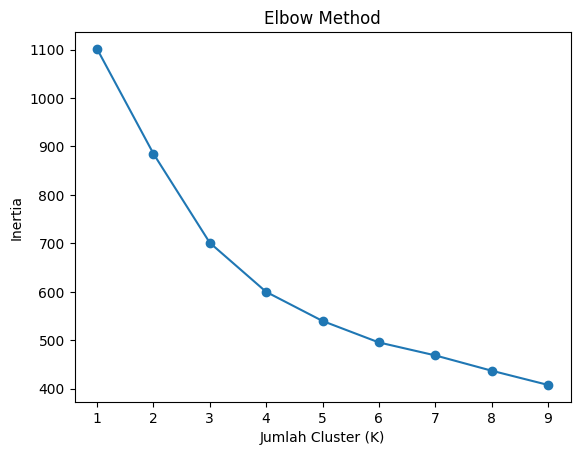

In [4]:
#Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    print(f'K={k}, Inertia={kmeans.inertia_}')
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### D. K-Means Modelling (K=3)
Melatih model dengan K=3 dan menyimpan label cluster ke dalam dataframe.

In [5]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans.fit(df_scaled)
labels = kmeans.labels_
df_label["Cluster"] = labels
df_label.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,2
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,2
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,2
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,2


### E. Cluster Profiling (Label Encoded)
Menganalisis karakteristik rata-rata setiap cluster menggunakan **Heatmap**.

=== Rata-rata Karakteristik Setiap Klaster ===
         FAVC      FCVC       NCP      CAEC       FAF       TUE    MTRANS
Cluster                                                                  
0         1.0  2.333046  2.763516  1.918317  1.021190  0.495678  0.007426
1         1.0  2.441987  2.681154  1.868403  0.972709  0.739258  3.015482
2         0.0  2.458212  2.705692  1.665272  1.270371  0.552364  2.606695
--------------------------------------------------


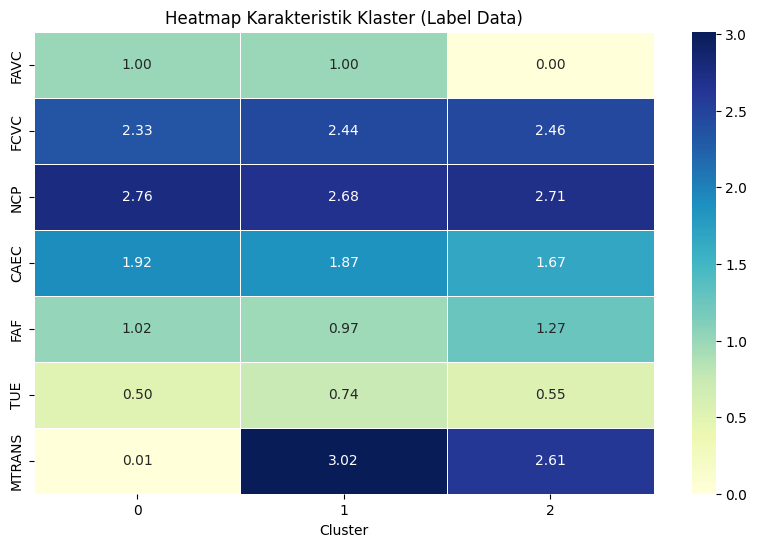

In [6]:
#Visualisasi Cluster
df_analysis = df_label_cluster.copy()
df_analysis['Cluster'] = labels

# Hitung Rata-rata Perilaku per Klaster
cluster_means = df_analysis.groupby('Cluster').mean()

print("=== Rata-rata Karakteristik Setiap Klaster ===")
print(cluster_means)
print("-" * 50)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap Karakteristik Klaster (Label Data)')
plt.show()

### F. Visualisasi Radar Chart (Label Encoded)
Melihat profil gaya hidup cluster dalam bentuk grafik radar.

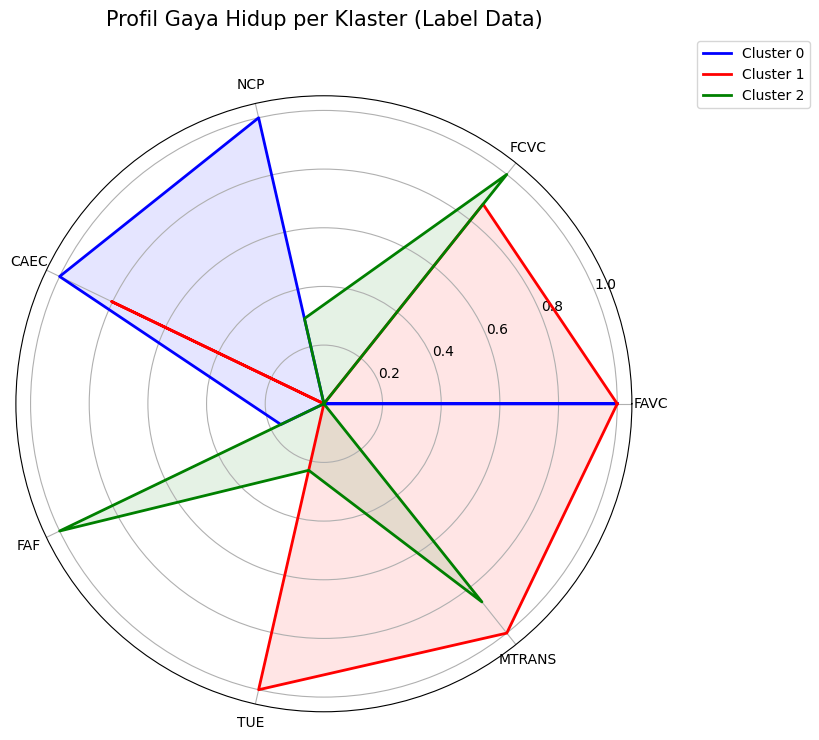

In [7]:
scaler_radar = MinMaxScaler()
df_radar_norm = pd.DataFrame(scaler_radar.fit_transform(cluster_means),
                             columns=cluster_means.columns)
df_radar_norm.reset_index(inplace=True)

def create_radar_chart(df, categories, title):
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    colors = ['b', 'r', 'g', 'c', 'm', 'y']
    
    for i in range(len(df)):
        values = df.loc[i].drop('index').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}', color=colors[i])
        ax.fill(angles, values, color=colors[i], alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.title(title, size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

categories = list(df_analysis.columns.drop('Cluster'))
create_radar_chart(df_radar_norm, categories, "Profil Gaya Hidup per Klaster (Label Data)")

### G. Evaluasi & Sebaran Data (Label Encoded)

Silhouette Score (Label): 0.3110569034419932


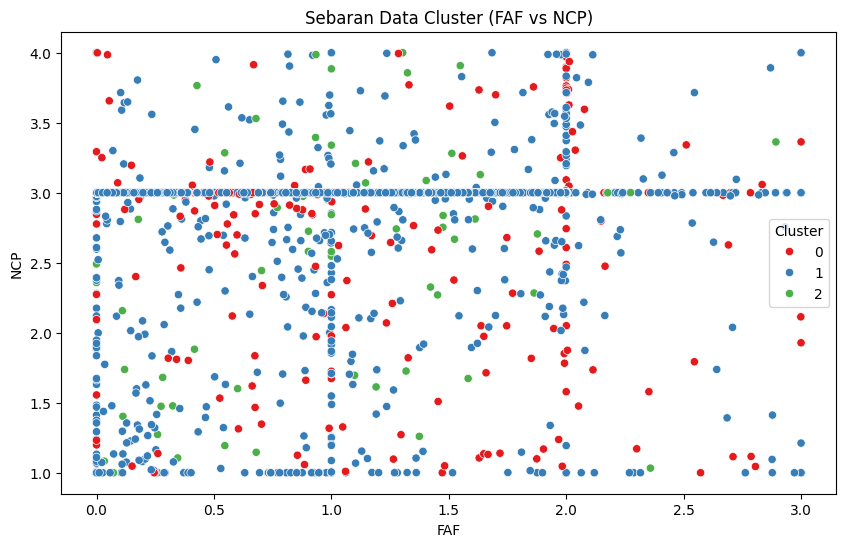

In [8]:
# Silhouette Score
score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score (Label): {score}')

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_label, x='FAF', y='NCP', hue='Cluster', palette='Set1')
plt.title('Sebaran Data Cluster (FAF vs NCP)')
plt.show()

---
## 2. Eksperimen II: Menggunakan Data One-Hot Encoding
Sekarang kita menggunakan dataset dengan fitur kategorikal yang diubah menjadi One-Hot Encoding.

In [9]:
# Load One-Hot Data
df_onehot = pd.read_csv('DataCleanOneHot.csv')
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2064 non-null   float64
 1   Height                              2064 non-null   float64
 2   Weight                              2064 non-null   float64
 3   FCVC                                2064 non-null   float64
 4   NCP                                 2064 non-null   float64
 5   CH2O                                2064 non-null   float64
 6   FAF                                 2064 non-null   float64
 7   TUE                                 2064 non-null   float64
 8   NObeyesdad                          2064 non-null   object 
 9   Gender_Male                         2064 non-null   int64  
 10  SMOKE_yes                           2064 non-null   int64  
 11  FAVC_yes                            2064 no

In [10]:
# Feature Selection & Scaling
df_onehot_cluster = df_onehot[["FAVC_yes", "FCVC", "NCP" ,"CAEC_Frequently","CAEC_Sometimes","CAEC_no" ,"FAF" ,"TUE" , "MTRANS_Bike" ,"MTRANS_Motorbike","MTRANS_Public_Transportation","MTRANS_Walking"]]

scaler = MinMaxScaler()
df_scaled_onehot = scaler.fit_transform(df_onehot_cluster)

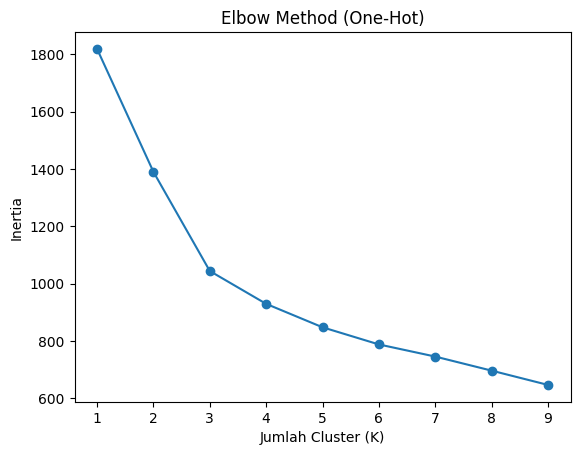

In [11]:
# Elbow Method (One-Hot)
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_onehot)
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (One-Hot)')
plt.show()

In [12]:
# K-Means Fitting (One-Hot)
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=20, algorithm='elkan', init='k-means++')
kmeans.fit(df_scaled_onehot)
labels_one = kmeans.labels_
df_onehot['Cluster'] = labels_one

### E. Cluster Profiling (One-Hot Encoded)
Analisis karakteristik rata-rata per cluster untuk data One-Hot.

=== Rata-rata Karakteristik Setiap Klaster (One-Hot) ===
         FAVC_yes      FCVC       NCP  CAEC_Frequently  CAEC_Sometimes  \
Cluster                                                                  
0        0.738255  2.416449  2.761770         0.781879        0.000000   
1        0.916667  2.445469  2.668813         0.000000        1.000000   
2        0.887234  2.363184  2.747345         0.000000        0.948936   

          CAEC_no       FAF       TUE  MTRANS_Bike  MTRANS_Motorbike  \
Cluster                                                                
0        0.110738  1.110148  0.657622     0.000000          0.016779   
1        0.000000  0.970273  0.728032     0.000000          0.000000   
2        0.008511  1.085322  0.517562     0.014894          0.010638   

         MTRANS_Public_Transportation  MTRANS_Walking  
Cluster                                                
0                            0.872483        0.033557  
1                            1.000000      

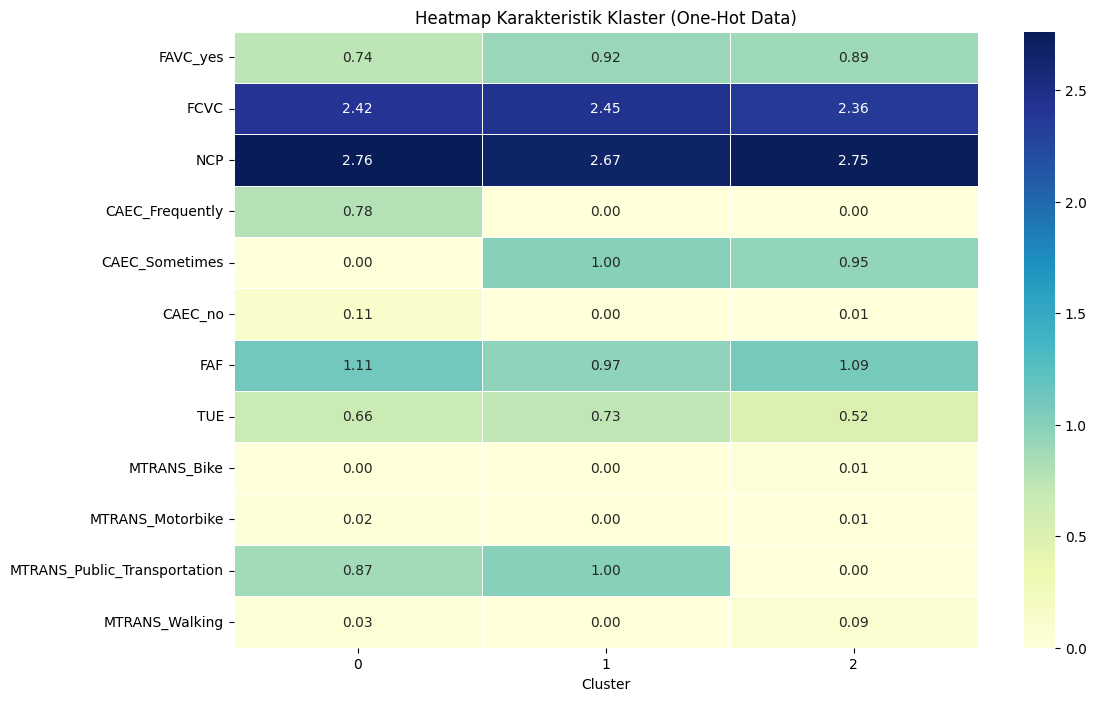

In [13]:
# --- Analisis Rata-rata Cluster ---
df_analysis_oh = df_onehot_cluster.copy()
df_analysis_oh['Cluster'] = labels_one

cluster_means_oh = df_analysis_oh.groupby('Cluster').mean()

print("=== Rata-rata Karakteristik Setiap Klaster (One-Hot) ===")
print(cluster_means_oh)
print("-" * 50)

# --- Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means_oh.T, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap Karakteristik Klaster (One-Hot Data)')
plt.show()

### F. Visualisasi Radar Chart (One-Hot Encoded)

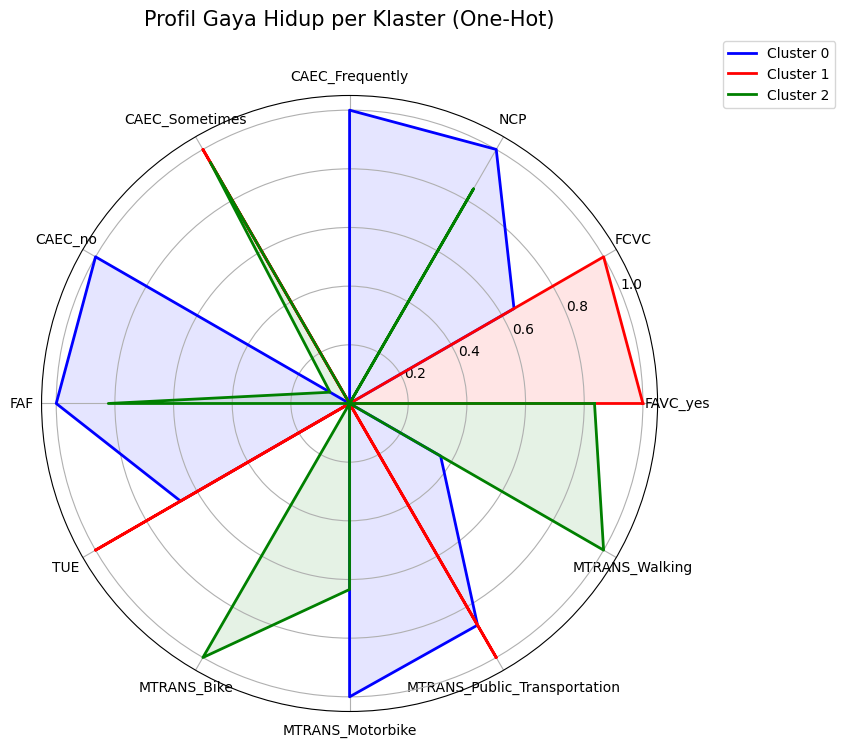

In [14]:
# --- Radar Chart ---
scaler_radar_oh = MinMaxScaler()
df_radar_norm_oh = pd.DataFrame(scaler_radar_oh.fit_transform(cluster_means_oh),
                                columns=cluster_means_oh.columns)
df_radar_norm_oh.reset_index(inplace=True)

categories_oh = list(df_analysis_oh.columns.drop('Cluster'))
# Menggunakan fungsi create_radar_chart yang sudah didefinisikan sebelumnya
create_radar_chart(df_radar_norm_oh, categories_oh, "Profil Gaya Hidup per Klaster (One-Hot)")

### G. Evaluasi & Sebaran Data (One-Hot Encoded)

Silhouette Score (One-Hot): 0.3723339998961264


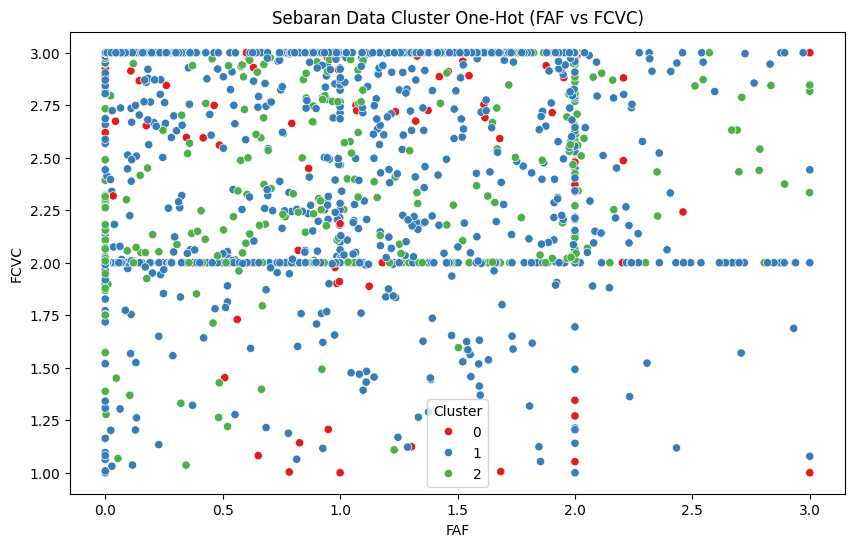

In [15]:
# Silhouette Score
score = silhouette_score(df_scaled_onehot, labels_one)
print(f'Silhouette Score (One-Hot): {score}')

# Visualisasi Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_onehot, x='FAF', y='FCVC', hue='Cluster', palette='Set1')
plt.title('Sebaran Data Cluster One-Hot (FAF vs FCVC)')
plt.show()